In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import scipy.optimize as op
from datetime import datetime
from datetime import timedelta

In [2]:
df = pd.read_csv('./who_data.csv')
df

,Day,Date,Austria,Belgium,Czechia,France,Germany,Greece,Ireland,Italy,Netherlands,Poland,Portugal,Romania,Spain,Switzerland,UK
0,0,10/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,11/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,12/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,13/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,14/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,15/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,16/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7,17/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,8,18/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9,19/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
dt = datetime.fromisoformat('2020-01-10 00:00:01')

In [4]:
cols = df.columns
print(cols)

Index(['Day', 'Date', 'Austria', 'Belgium', 'Czechia', 'France', 'Germany',
       'Greece', 'Ireland', 'Italy', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Spain', 'Switzerland', 'UK'],
      dtype='object')


In [5]:
nd = 2 # Number of date columns
nc = len(cols)-nd # Number of country columns
nc

15

In [6]:
numbered_days = df.Day.values

In [7]:
def mynll(y,x,tt):
    mu = x[0]*np.exp(x[1]*tt)
    od = x[2]*np.ones(len(tt))
    p = 1/od
    r = mu/(od-1)
    return -np.sum(st.nbinom.logpmf(y,r,p))

In [8]:
dd = np.arange(42,78,8)
xl = []
for j in range(0,len(dd)):
    xl.append((dt + timedelta(days=(int(dd[j])))).strftime('%d/%m'))

In [9]:
start_day = np.zeros(nc)
ncstart = 25.0
day_ran = 9.0

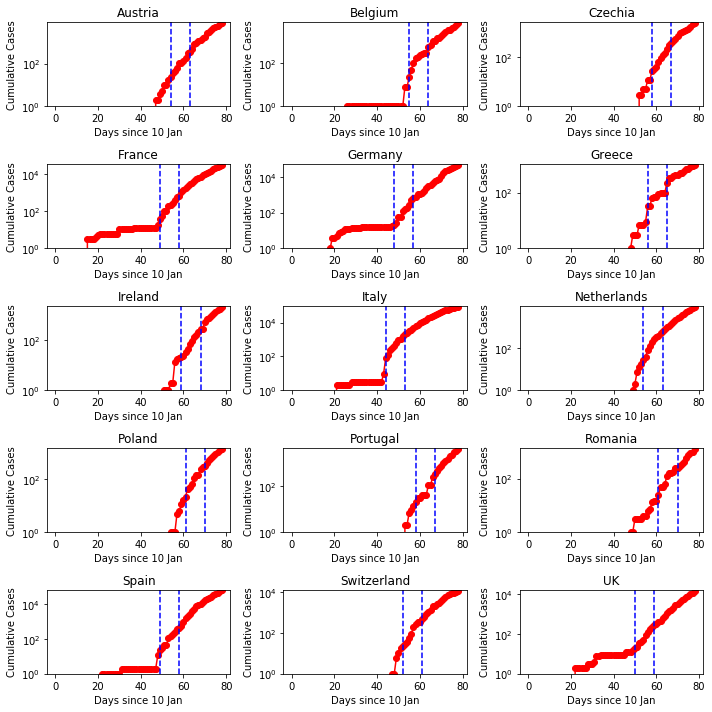

In [10]:
plt.figure(figsize=(10,10))
for i in range(0,nc):
    cdf = df[[df.columns[nd+i]]]
    name = cdf.columns[0]
    cum = cdf.values.T[0]
    start_day[i] = np.argmax(cum >= 20)
    plt.subplot(5,3,i+1)
    plt.plot(numbered_days,cum,marker='o',c='r')
    ym = 1.1*np.max(cum)
    plt.ylim([1, ym])
    plt.plot(start_day[i]*np.array([1.0, 1.0]),[1,ym],linestyle='--',c='b')
    plt.plot((start_day[i]+day_ran)*np.array([1.0, 1.0]),[1,ym],linestyle='--',c='b')
    plt.yscale('log')
    plt.title(name)
    plt.xlabel('Days since 10 Jan')
    plt.ylabel('Cumulative Cases')
plt.tight_layout()

In [11]:
start_day[3] += 7 # France
start_day[11] += 7 # Romania
start_day[12] += 7 # Spain
start_day[14] += 7 # UK

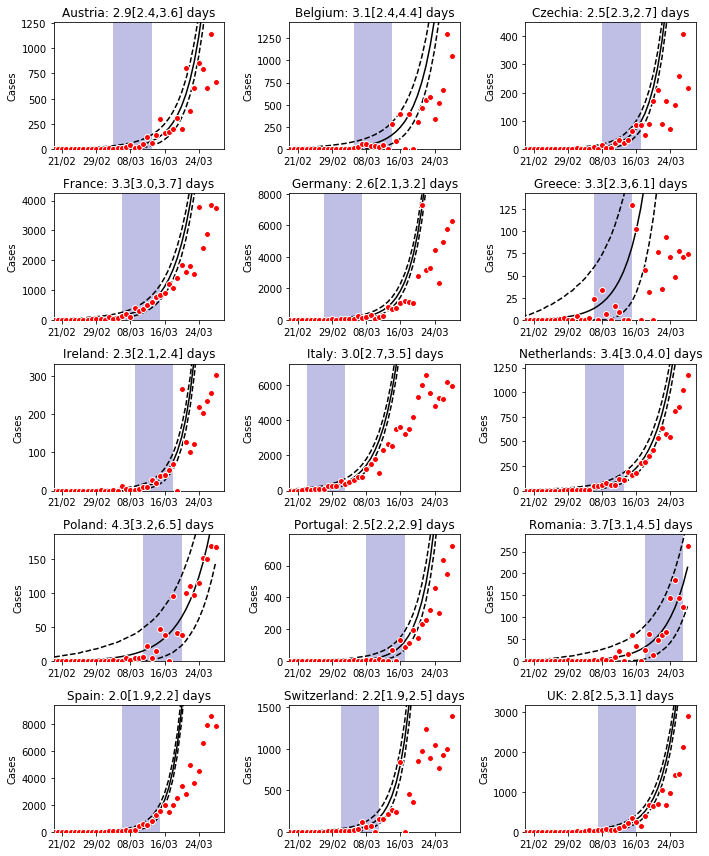

In [12]:
x01 = np.array([ncstart,0.25,5])
h = 1e-3
plt.figure(figsize=(10,12))
for i in range(0,nc):
    cdf = df[[df.columns[nd+i]]] # Country Data Frame
    name = cdf.columns[0]
    cum = cdf.values.T[0]
    inc = np.diff(np.append(np.array([0]),cum))
    
    sd = int(start_day[i])
    ed = sd+int(day_ran)
        
    yy = inc[sd:(ed+1)].copy()
    tt = np.arange(0,len(yy))
    jj = (yy!=0.0)
    yy = yy[jj]
    tt = tt[jj]
    
    ax = plt.subplot(5,3,i+1)
    
    nll = lambda xx: mynll(yy,xx,tt.copy())
    fout = op.minimize(nll,x01,method='Nelder-Mead')
    sig = h/np.sqrt(nll(fout.x + np.array([0.0, h, 0.0])) - 2.0*nll(fout.x) + nll(fout.x - np.array([0.0, h, 0.0])))
    dt0 = np.log(2.0)/fout.x[1]
    dtl = np.log(2.0)/(fout.x[1] + 2.0*sig)
    dtu = np.log(2.0)/(fout.x[1] - 2.0*sig)
    
    mu = fout.x[0]*np.exp(fout.x[1]*(numbered_days-numbered_days[sd]))
    od = fout.x[2]*np.ones(len(numbered_days))
    p = 1/od
    r = mu/(od-1)
    plt.plot(numbered_days,mu,linestyle='-',c='k',label='Doubling time {:.1f} days'.format(dt0),zorder=1)
    plt.plot(numbered_days,st.nbinom.ppf(0.025,r,p),linestyle='--',c='k',zorder=2)
    plt.plot(numbered_days,st.nbinom.ppf(0.975,r,p),linestyle='--',c='k',zorder=2)
    ym = 1.1*np.max(inc)
    rect = patches.Rectangle((sd,0),day_ran,ym,facecolor=[0.75,0.75,0.9],zorder=1)
    ax.add_patch(rect)
    plt.scatter(numbered_days,inc,marker='o',c='r',edgecolor='w',label='Data',zorder=3)
    plt.title(name + ': {:.1f}[{:.1f},{:.1f}] days'.format(dt0,dtl,dtu))
    plt.xlim([40,80])
    plt.ylim([0, ym])
    plt.xticks(dd,xl)
    plt.ylabel('Cases')
plt.tight_layout()

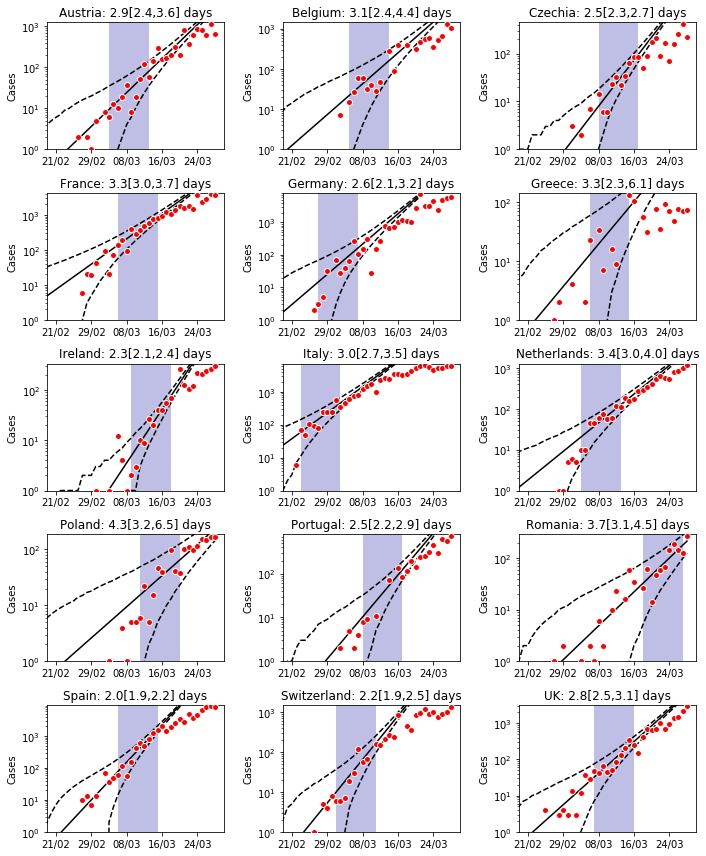

In [13]:
x01 = np.array([ncstart,0.25,5])
h = 1e-3
plt.figure(figsize=(10,12))
for i in range(0,nc):
    cdf = df[[df.columns[nd+i]]]
    name = cdf.columns[0]
    cum = cdf.values.T[0]
    inc = np.diff(np.append(np.array([0]),cum))
    
    sd = int(start_day[i])
    ed = sd+int(day_ran)
        
    yy = inc[sd:(ed+1)].copy()
    tt = np.arange(0,len(yy))
    jj = (yy!=0.0)
    yy = yy[jj]
    tt = tt[jj]
    
    ax = plt.subplot(5,3,i+1)
    
    nll = lambda xx: mynll(yy,xx,tt.copy())
    fout = op.minimize(nll,x01,method='Nelder-Mead')
    sig = h/np.sqrt(nll(fout.x + np.array([0.0, h, 0.0])) - 2.0*nll(fout.x) + nll(fout.x - np.array([0.0, h, 0.0])))
    dt0 = np.log(2.0)/fout.x[1]
    dtl = np.log(2.0)/(fout.x[1] + 2.0*sig)
    dtu = np.log(2.0)/(fout.x[1] - 2.0*sig)
    
    mu = fout.x[0]*np.exp(fout.x[1]*(numbered_days-numbered_days[sd]))
    od = fout.x[2]*np.ones(len(numbered_days))
    p = 1/od
    r = mu/(od-1)
    plt.plot(numbered_days,mu,linestyle='-',c='k',label='Doubling time {:.1f} days'.format(dt0),zorder=1)
    plt.plot(numbered_days,st.nbinom.ppf(0.025,r,p),linestyle='--',c='k',zorder=2)
    plt.plot(numbered_days,st.nbinom.ppf(0.975,r,p),linestyle='--',c='k',zorder=2)
    ym = 1.1*np.max(inc)
    rect = patches.Rectangle((sd,0),day_ran,ym,facecolor=[0.75,0.75,0.9],zorder=1)
    ax.add_patch(rect)
    plt.scatter(numbered_days,inc,marker='o',c='r',edgecolor='w',label='Data',zorder=3)
    plt.title(name + ': {:.1f}[{:.1f},{:.1f}] days'.format(dt0,dtl,dtu))
    plt.xlim([40,80])
    plt.ylim([0, ym])
    plt.xticks(dd,xl)
    plt.ylabel('Cases')
    plt.yscale('log')
    plt.ylim([1,ym])
plt.tight_layout()